In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv("academic_performance_analytics_complete.csv")
df

,Timestamp,Student_ID,Age,Gender,Ethnicity,SES,Location,Enrollment_Status,GPA,Attendance_Rate,...,Peer_Interaction_Score,Academic_Support_Utilization,Stress_Indicator_Score,Assignment_Completion_Rate,Learning_Satisfaction_Level,Academic_Performance_Category,Sentiment_Classification,Requirement_Fulfillment_Status,Course_Satisfaction_Level,Engagement_Level
0,2018-07-14 06:00:00,1678,25,0,White,Low,"Texas, Dallas",0,2.283531,0.9,...,0.341722,0,0.346726,0.7,Medium,High,Neutral,Partially Met,Neutral,Active
1,2018-09-27 03:00:00,3106,19,1,White,Low,"Texas, Dallas",0,2.787184,0.6,...,0.665257,0,0.957973,0.8,Medium,Medium,Negative,Partially Met,Neutral,Active
2,2022-04-25 00:00:00,4350,22,1,African American,Low,"Texas, Dallas",0,2.689566,0.8,...,0.501590,0,0.431574,0.7,Low,Medium,Neutral,Fully Met,Satisfied,Moderate
3,2024-02-24 10:00:00,2890,20,0,White,Medium,"Texas, Dallas",0,2.486635,0.6,...,0.665658,0,0.633358,0.8,High,High,Neutral,Partially Met,Unsatisfied,Active
4,2020-10-09 23:00:00,4019,25,1,White,Medium,"Texas, Dallas",0,3.258069,1.0,...,0.555273,0,0.581689,0.8,Medium,Medium,Positive,Partially Met,Neutral,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61340,2019-10-29 18:00:00,3885,26,1,White,Low,"Texas, Dallas",0,2.149150,0.7,...,0.481441,0,0.627292,0.9,High,Low,Positive,Fully Met,Satisfied,Moderate
61341,2020-09-11 18:00:00,2972,29,1,White,High,"Texas, Dallas",1,2.452148,0.9,...,0.621769,0,0.990375,0.8,Medium,High,Neutral,Partially Met,Neutral,Active
61342,2018-11-14 12:00:00,3397,19,1,White,Low,"Texas, Dallas",1,2.372740,0.9,...,0.498190,0,0.469423,0.8,High,Medium,Positive,Partially Met,Satisfied,Active
61343,2023-03-15 22:00:00,4617,25,0,White,High,"Texas, Dallas",0,2.654484,0.8,...,0.420456,1,0.633345,0.9,High,Medium,Neutral,Partially Met,Satisfied,Inactive


In [3]:
# Tipos de datos de las columnas de tabla1
print("Tipos de datos de tabla1:")
print(df.dtypes)


Tipos de datos de tabla1:
Timestamp                          object
Student_ID                          int64
Age                                 int64
Gender                              int64
Ethnicity                          object
SES                                object
Location                           object
Enrollment_Status                   int64
GPA                               float64
Attendance_Rate                   float64
Study_Hours_per_Week              float64
Extracurricular_Participation       int64
Course_Load                         int64
Major_Field_of_Study               object
Previous_Academic_Performance     float64
Course_Type                        object
Course_Difficulty                  object
Instructor_Rating                 float64
Class_Size                          int64
Sentiment_Score                   float64
Feedback_Length                     int64
Access_to_Learning_Materials        int64
Internet_Accessibility              int64
Counseli

In [4]:
# 1.1 Frequency Tables
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
0    36850
1    24495
Name: count, dtype: int64

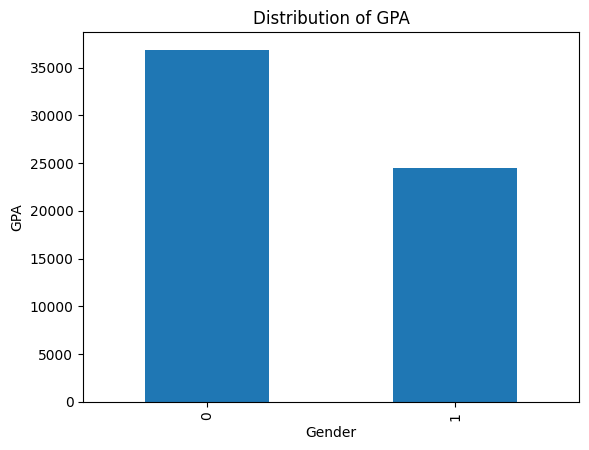

In [5]:
# 1.2 Visualizations
gender_counts.plot(kind='bar')
plt.title('Distribution of GPA')
plt.xlabel('Gender')
plt.ylabel('GPA')
plt.show()

In [6]:
GPA_counts = df['GPA'].value_counts()
GPA_counts

GPA
4.000000    88
2.283531     1
2.881222     1
2.416630     1
2.455090     1
            ..
1.677155     1
2.873902     1
2.533220     1
2.313971     1
2.708859     1
Name: count, Length: 61258, dtype: int64

In [7]:
# Agrupar por 'Gender' y calcular la media de 'GPA'
mean_gpa_by_gender = df.groupby('Gender')['GPA'].mean()

# Mostrar el resultado
print(mean_gpa_by_gender)

Gender
0    2.498067
1    2.499581
Name: GPA, dtype: float64


In [8]:
# Agrupar por 'Gender' y calcular la mediana de 'GPA'
median_gpa_by_gender = df.groupby('Gender')['GPA'].median()

# Mostrar el resultado
print(median_gpa_by_gender)

Gender
0    2.496363
1    2.497287
Name: GPA, dtype: float64


In [9]:
# Agrupar por 'Gender' y calcular la moda de 'GPA'
mode_gpa_by_gender = df.groupby('Gender')['GPA'].agg(lambda x: x.mode())

# Mostrar el resultado
print(mode_gpa_by_gender)

Gender
0    4.0
1    4.0
Name: GPA, dtype: float64


In [10]:
# Calcular la media, el máximo y el mínimo de GPA para cada grupo de horas de estudio
gpa_stats_by_study_hours = df.groupby('Study_Hours_per_Week')['GPA'].agg(['mean', 'max', 'min'])

# Mostrar el resultado
print(gpa_stats_by_study_hours)

# Encontrar los valores máximos y mínimos de GPA junto con sus horas de estudio
max_gpa = df.loc[df['GPA'].idxmax()]
min_gpa = df.loc[df['GPA'].idxmin()]

print("\nMáximo GPA:")
print(max_gpa)

print("\nMínimo GPA:")
print(min_gpa)

                          mean       max       min
Study_Hours_per_Week                              
5.000000              2.526614  4.000000  0.616923
5.001477              1.751939  1.751939  1.751939
5.006362              3.112631  3.112631  3.112631
5.016161              2.958737  2.958737  2.958737
5.020844              2.257705  2.257705  2.257705
...                        ...       ...       ...
33.339218             3.138629  3.138629  3.138629
33.558457             2.090827  2.090827  2.090827
34.043612             3.581028  3.581028  3.581028
34.137827             2.145134  2.145134  2.145134
34.805833             3.058071  3.058071  3.058071

[59904 rows x 3 columns]

Máximo GPA:
Timestamp                         2022-10-07 17:00:00
Student_ID                                       3054
Age                                                21
Gender                                              0
Ethnicity                            African American
SES                         

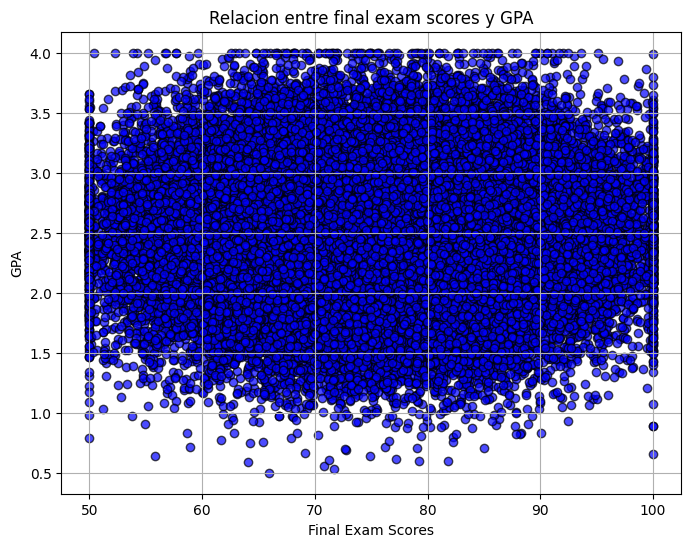

In [11]:
# Crear un scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Final_Exam_Scores'], df['GPA'], color='b', alpha=0.7, edgecolors='k')

# Etiquetas y título del gráfico
plt.title('Relacion entre final exam scores y GPA')
plt.xlabel('Final Exam Scores')
plt.ylabel('GPA')

# Mostrar el gráfico
plt.grid(True)  # Para añadir una cuadrícula de referencia
plt.show()

/var/folders/yx/vm4363_160j93njqbz4_l16r0000gp/T/ipykernel_71111/3946180832.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_gpa_by_bins = df.groupby('Score_Bins')['GPA'].mean().reset_index()
/var/folders/yx/vm4363_160j93njqbz4_l16r0000gp/T/ipykernel_71111/3946180832.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_gpa_by_bins, x='Score_Bins', y='GPA',palette="husl")


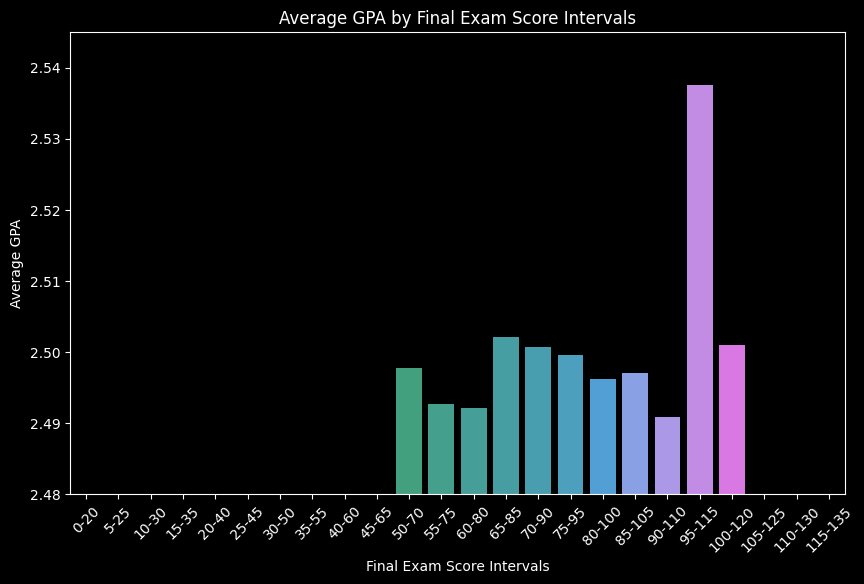

In [50]:
import seaborn as sns
# Crear categorías de puntos (bins) de 20 en 20
bins = np.arange(0, 121, 5)
labels = [f'{i}-{i+20}' for i in bins[:-1]]
df['Score_Bins'] = pd.cut(df['Final_Exam_Scores'], bins=bins, labels=labels, right=False)

# Calcular la media de GPA para cada grupo de puntos
mean_gpa_by_bins = df.groupby('Score_Bins')['GPA'].mean().reset_index()

# Establecer el estilo oscuro
plt.style.use("dark_background")
# Crear la figura con fondo oscuro
plt.figure(figsize=(10, 6))

sns.barplot(data=mean_gpa_by_bins, x='Score_Bins', y='GPA',palette="husl")
plt.xlabel('Final Exam Score Intervals')
plt.ylabel('Average GPA')
plt.title('Average GPA by Final Exam Score Intervals')
plt.xticks(rotation=45)

# Ajustar los límites del eje y
plt.ylim(2.48, 2.545)

# Mostrar el gráfico
plt.show()

/var/folders/yx/vm4363_160j93njqbz4_l16r0000gp/T/ipykernel_71111/2460244669.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_gpa_by_bins = df.groupby('Score_Bins')['GPA'].min().reset_index()
/var/folders/yx/vm4363_160j93njqbz4_l16r0000gp/T/ipykernel_71111/2460244669.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_gpa_by_bins, x='Score_Bins', y='GPA',palette="husl")


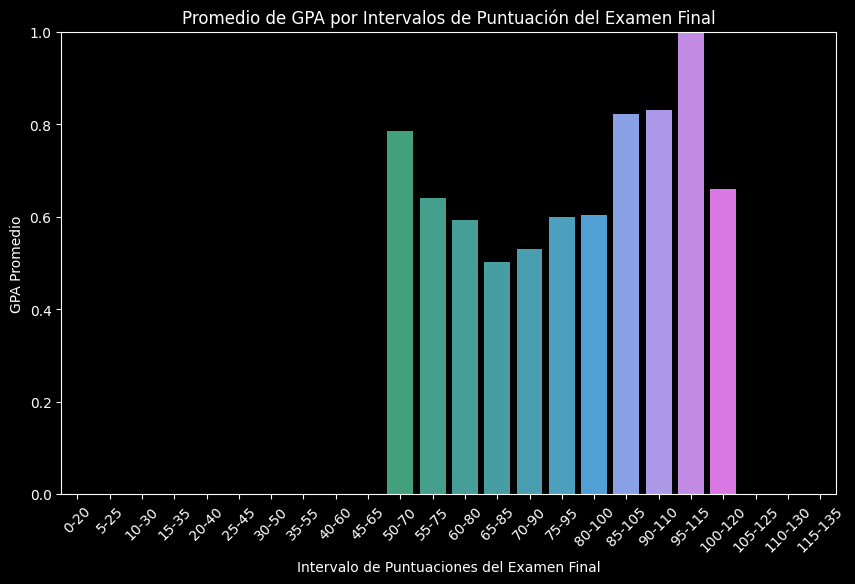

In [46]:
# Crear categorías de puntos (bins) de 20 en 20
bins = np.arange(0, 121, 5)
labels = [f'{i}-{i+20}' for i in bins[:-1]]
df['Score_Bins'] = pd.cut(df['Final_Exam_Scores'], bins=bins, labels=labels, right=False)

# Calcular la media de GPA para cada grupo de puntos
mean_gpa_by_bins = df.groupby('Score_Bins')['GPA'].min().reset_index()

# Establecer el estilo oscuro
plt.style.use("dark_background")
# Crear la figura con fondo oscuro
plt.figure(figsize=(10, 6))

# Crear un barplot de medias de GPA por grupos de puntos

sns.barplot(data=mean_gpa_by_bins, x='Score_Bins', y='GPA',palette="husl")
plt.xlabel('Intervalo de Puntuaciones del Examen Final')
plt.ylabel('GPA Promedio')
plt.title('Promedio de GPA por Intervalos de Puntuación del Examen Final')
plt.xticks(rotation=45)

# Ajustar los límites del eje y
plt.ylim(0, 1)

# Mostrar el gráfico
plt.show()